In [1]:
import networkx as nx
import matplotlib.pyplot as plt


# Defining a Class
class GraphVisualization:

    def __init__(self):

        # visual is a list which stores all
        # the set of edges that constitutes a
        # graph
        self.visual = []

    # addEdge function inputs the vertices of an
    # edge and appends it to the visual list
    def addEdge(self, a, b):
        temp = [a, b]
        self.visual.append(temp)

    # In visualize function G is an object of
    # class Graph given by networkx G.add_edges_from(visual)
    # creates a graph with a given list
    # nx.draw_networkx(G) - plots the graph
    # plt.show() - displays the graph
    def visualize(self):
        G = nx.Graph()
        G.add_edges_from(self.visual)
        nx.draw_networkx(G)
        plt.show()

In [2]:
import random
import heapq
import numpy
class IsingModel:
    def __init__(self,vertices,alpha,beta,dbg = False):
        global d,sparseFactor
        assert(alpha<beta and alpha>0)
        self.vertices = vertices
        self.alpha = alpha
        self.beta = beta
        self.model = [[0 for _ in range(vertices)] for _ in range(vertices)]
        G = nx.random_regular_graph(d=d,n=vertices);
        self.neighbours = [[] for i in range(vertices)]
        for i in range(vertices):
            for j in range(vertices):
                if i!=j and G.has_edge(i,j):
                    self.model[i][j] = (random.randint(0,1)*2-1)*random.uniform(alpha,beta)
                    self.neighbours[i].append(j);
        # for i in range(int(vertices*d*sparseFactor)):
        #     a,b = random.randint(0,vertices-1),random.randint(0,vertices-1);
        #     if not(a==b or self.model[a][b]!=0 or sum([1 if self.model[a][i]!=0 else 0 for i in range(vertices)])>=d or sum([1 if self.model[b][i]!=0 else 0 for i in range(vertices)])>=d):
        #         self.model[a][b] = (1 if random.uniform(0,1)>.5 else -1)*random.uniform(alpha,beta)
        #         self.model[b][a] = self.model[a][b]


    def generateNStates(self,numStates):
        states = [[1 if random.random()<.5 else -1 for i in range(self.vertices)]]
        updates = [(-1,-numpy.inf)]          #(element,time)
        timeQueue = []
        for i in range(self.vertices):
            heapq.heappush(timeQueue,(numpy.random.exponential(1),i))
        for iter in range(numStates):
            curr = states[iter].copy()
            time,node = heapq.heappop(timeQueue)
            x=0;
            for i in range(self.vertices):
                x+=2*curr[i]*self.model[i][node]
            if random.random()<1/(1+numpy.exp(-x)):
                curr[node] = 1
            else:
                curr[node]=-1
            states.append(curr)
            updates.append((node,time))
            heapq.heappush(timeQueue,(time+numpy.random.exponential(1),node))

        return states, updates

    def generateStatesTillT(self,T):
        states = [[1 if random.random()<.5 else -1 for i in range(self.vertices)]]
        # states = [[1 for i in range(self.vertices)]]
        updates = [(-1,-numpy.inf)]          #(element,time)
        timeQueue = []
        for i in range(self.vertices):
            heapq.heappush(timeQueue,(numpy.random.exponential(1),i))
        timeElapsed =-1;
        while timeElapsed<T:
            curr = states[-1].copy()
            time,node = heapq.heappop(timeQueue)
            x=0;
            for i in range(self.vertices):
                x+=2*curr[i]*self.model[i][node]
            if random.random()<1/(1+numpy.exp(-x)):
                curr[node] = 1
            else:
                curr[node]=-1
            timeElapsed = time
            states.append(curr)
            updates.append((node,time))
            heapq.heappush(timeQueue,(time+numpy.random.exponential(1),node))

        return states, updates
    def generateStatesTillTEfficient(self,T):
        updates = [{"ele":-1, "time":-numpy.inf, "flipped":False}]          #(element,time,spin flipped)
        # currState = [1 for i in range(self.vertices)]
        currState = [1 if random.random()<.5 else -1 for i in range(self.vertices)];
        initState = currState.copy()
        timeQueue = []
        for i in range(self.vertices):
            heapq.heappush(timeQueue,(numpy.random.exponential(1),i))
        timeElapsed =-1;
        while timeElapsed<T:
            time,node = heapq.heappop(timeQueue)
            x=0;
            p = currState[node]
            for i in self.neighbours[node]:
                x+=2*currState[i]*self.model[i][node]
            if random.random()<1/(1+numpy.exp(-x)):
                currState[node] = 1
            else:
                currState[node]=-1
            timeElapsed = time
            updates.append({"ele":node, "time":time, "flipped":p!=currState[node]})
            heapq.heappush(timeQueue,(time+numpy.random.exponential(1),node))

        return  initState,updates
    @staticmethod
    def presentStates(stateData):
        n = len(stateData[0])
        for iter in range(n):
            for v in stateData[0][iter]:
                print("+" if v>0 else "-",end  = " ")
            print(f"\t{stateData[1][iter][0]}\t{stateData[1][iter][1]}")
def showModel(model):
    G = GraphVisualization()
    for i in range(len(model)):
        for j in range(i):
            if(model[i][j]!=0):
                G.addEdge(i,j);
    G.visualize()

def showMat(model):
    for i in range(len(model)):
        for j in range(len(model)):
            try:
                print("{0:.2f}".format(model[i][j]),end = " ")
            except:
                print(model[i][j],end=" ")
        print()



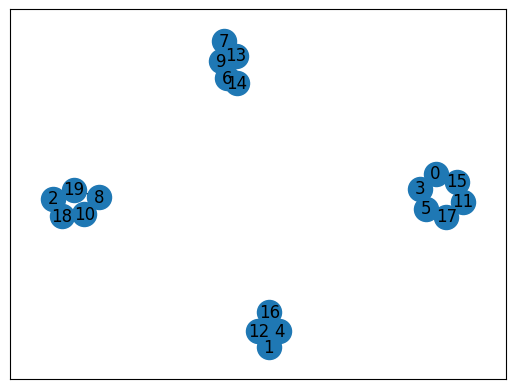

In [3]:
d=2
sparseFactor = .2
a = IsingModel(20,.1,1,True)
showModel(a.model)
random.seed(0)
numpy.random.seed(0)
# a.generateStatesTillTEfficient(1)
# IsingModel.presentStates(a.generateStatesTillT(1))

In [4]:
def predictGraphEfficient(data,dbg = False):
    global L, threshholdCoeff,outs
    # IsingModel.presentStates(data)
    currState,updates = data;
    vertices= len(currState)
    X = [[[0,0] for i in range(vertices)] for i in range(vertices)]
    lastUpd = [[0] for i in range(vertices)]
    stateIter = 1
    kMax = int(numpy.floor(updates[-1]["time"]/L))
    for k in range(1,kMax+1):
        stateL_3 = -1;
        start = stateIter
        range1,range2,range3 = set(),set(),set()
        possibleJ = set();
        while stateIter<len(updates) and updates[stateIter]["time"]<k*L:
            if updates[stateIter]["time"]<(k-1)*L+L/3:
                range1.add(updates[stateIter]["ele"])
            elif stateL_3 ==-1:
                stateL_3 = currState.copy();
            if updates[stateIter]["time"]<(k-1)*L+2*L/3:
                if updates[stateIter]["time"]>=(k-1)*L+L/3:
                    range2.add(updates[stateIter]["ele"])
            else:
                range3.add(updates[stateIter]["ele"])
            if updates[stateIter]["flipped"]:
                    currState[updates[stateIter]["ele"]] *=-1;
            stateIter+=1
        for j in range2:
            if currState[j]!=stateL_3[j] and j not in range1 and j not in range3:
                possibleJ.add(j)
        for i in range1:
            if i in range3 and i not in range2:
                for j in possibleJ:
                    X[i][j][0]+=currState[j]*(stateL_3[i]-currState[i])
                    X[j][i][0]+=currState[j]*(stateL_3[i]-currState[i])
                    X[j][i][1]+=1
                    X[i][j][1]+=1
    q = (numpy.exp(-L/3)*(1-numpy.exp(-L/3)))**3
    model =[]
    for i in range(vertices):
        model.append([])
        for j in range(vertices):
            if X[i][j][1]>0 and abs(X[i][j][0]/kMax)>threshholdCoeff*L*d*q:
                model[-1].append(1)
            else:
                # if X[i][j][1]>0 and dbg:
                #     print(X[i][j])

                model[-1].append(0)
    if dbg:
        print(L*d*q,kMax)
        outs= [[X[i][j][0] for j in range(vertices)]for i in range(vertices)];
        showMat([[X[i][j][0] for j in range(vertices)]for i in range(vertices)])
    return model

In [5]:
def predictGraph(data,dbg = False):
    global L, threshholdCoeff
    # IsingModel.presentStates(data)
    states,updates = data;
    vertices= len(states[0])
    X = [[[0,0] for i in range(vertices)] for i in range(vertices)]
    lastUpd = [[0] for i in range(vertices)]
    stateIter= 1;
    kMax = int(numpy.floor(updates[-1][1]/L))
    for k in range(1,kMax+1):
        start = stateIter
        L_3 = stateIter
        range1,range2,range3 = set(),set(),set()
        L2_3 = stateIter
        possibleJ = set();
        while stateIter<len(states) and updates[stateIter][1]<k*L:
            if updates[stateIter][1]<(k-1)*L+L/3:
                range1.add(updates[stateIter][0])
                L_3 = stateIter
            if updates[stateIter][1]<(k-1)*L+2*L/3:
                if updates[stateIter][1]>(k-1)*L+L/3:
                    range2.add(updates[stateIter][0])
                L2_3 = stateIter
            else:
                range3.add(updates[stateIter][0])
            stateIter+=1
        for j in range2:
            if states[L_3][j]!=states[L2_3][j] and j not in range1 and j not in range3:
                possibleJ.add(j)
        for i in range1:
            if i in range3 and i not in range2:
                for j in possibleJ:
                    X[i][j][0]+=states[L2_3][j]*(states[L_3][i]-states[stateIter-1][i])
                    X[j][i][0]+=states[L2_3][j]*(states[L_3][i]-states[stateIter-1][i])
                    X[j][i][1]+=1
                    X[i][j][1]+=1
    q = (numpy.exp(-L/3)*(1-numpy.exp(-L/3)))**3
    model =[]
    for i in range(vertices):
        model.append([])
        for j in range(vertices):
            if X[i][j][1]>0 and abs(X[i][j][0]/X[i][j][1])>threshholdCoeff*L*d*q:
                model[-1].append(alpha)
            else:
                # if X[i][j][1]>0 and dbg:
                #     print(X[i][j])

                model[-1].append(0)
    if dbg:
        print(L*d*q)
        showMat(X)
    return model

In [14]:
alpha = 100/101
beta = 1
vertices = 14
d=3
sparseFactor = 1
# random.seed(0)
# numpy.random.seed(0)
a = IsingModel(vertices,alpha,beta)
data = a.generateStatesTillTEfficient(500000);

In [15]:
import numpy as np
def predictGraph2(data,dbg = False):
    global L
    # IsingModel.presentStates(data)
    states,updates = data;
    vertices= len(states[0])
    X = [[[0,0] for i in range(vertices)] for i in range(vertices)]
    lastUpd = [[0] for i in range(vertices)]
    for iter in range(1,len(states)):
        node,time = updates[iter]
        kl = numpy.floor(time/L)*L
        if time-kl>2*L/3 and 0<=updates[lastUpd[node][-1]][1]-kl<=L/3:
            if dbg:
                print(node,time)
            for j in range(vertices):
                isValid = False
                for pos in lastUpd[j][::-1]:
                    t = updates[pos][1]
                    if t<kl:
                        break
                    if kl+L/3<t<kl+2*L/3:
                        isValid = True
                    else:
                        isValid = False
                        break
                if states[iter][j]==states[lastUpd[node][-1]][j]:
                    continue
                if isValid:
                    X[node][j][0]+=states[iter][j]*(states[lastUpd[node][-1]][node]-states[iter][node])
                    X[j][node][0]+=states[iter][j]*(states[lastUpd[node][-1]][node]-states[iter][node])
                    X[j][node][1]+=1
                    X[node][j][1]+=1
        lastUpd[node].append(iter)
    q = (numpy.exp(-L/3)*(1-numpy.exp(-L/3)))**3
    model =[]
    for i in range(vertices):
        model.append([])
        for j in range(vertices):
            if X[i][j][1]>0 and abs(X[i][j][0]/X[i][j][1])>90*L*d*q:
                model[-1].append((1 if X[i][j][0]>0 else -1)*alpha)
            else:
                # if X[i][j][1]>0 and dbg:
                #     print(X[i][j])
                model[-1].append(0)
    return model
def getDivergence(A, B):
    s = len(A)
    all_states = np.array([(np.array(list(bin(i)[2:].zfill(s)), dtype=int)*2-1) for i in range(2**s)])  #generates all states
    div=0;
    probsA = np.array([np.exp(x @ A @ x.T / 2) for x in all_states])
    probsA = probsA / probsA.sum()
    probsB = np.array([np.exp(x @ B @ x.T / 2) for x in all_states])
    probsB = probsB / probsB.sum()
    for i in range(2**s):
        div+=probsA[i]*np.log(probsA[i]/probsB[i]);
    return div
print(data[1][:10])

[{'ele': -1, 'time': -inf, 'flipped': False}, {'ele': 11, 'time': 0.010340277915936412, 'flipped': False}, {'ele': 9, 'time': 0.023834399493625157, 'flipped': False}, {'ele': 3, 'time': 0.02901269957509457, 'flipped': False}, {'ele': 6, 'time': 0.05823533783320357, 'flipped': False}, {'ele': 10, 'time': 0.2466024233546992, 'flipped': True}, {'ele': 4, 'time': 0.26701063108100426, 'flipped': True}, {'ele': 13, 'time': 0.3086739898467638, 'flipped': False}, {'ele': 8, 'time': 0.4857149446000733, 'flipped': False}, {'ele': 1, 'time': 0.48583117314131646, 'flipped': False}]


0.5 0.0021944869646496885
0.0032917304469745326 10000
0.00 0.00 2.00 2.00 0.00 -10.00 4.00 4.00 -12.00 6.00 0.00 -16.00 -4.00 0.00 
0.00 0.00 -4.00 -8.00 0.00 -8.00 10.00 -4.00 0.00 -4.00 2.00 -6.00 6.00 0.00 
2.00 -4.00 0.00 -6.00 4.00 8.00 10.00 -4.00 8.00 2.00 2.00 18.00 -2.00 4.00 
2.00 -8.00 -6.00 0.00 6.00 6.00 2.00 -4.00 -2.00 0.00 2.00 6.00 -6.00 6.00 
0.00 0.00 4.00 6.00 0.00 4.00 0.00 4.00 2.00 0.00 -2.00 2.00 0.00 0.00 
-10.00 -8.00 8.00 6.00 4.00 0.00 -4.00 -4.00 2.00 -2.00 0.00 0.00 -2.00 8.00 
4.00 10.00 10.00 2.00 0.00 -4.00 0.00 -4.00 -10.00 -4.00 -8.00 4.00 -4.00 0.00 
4.00 -4.00 -4.00 -4.00 4.00 -4.00 -4.00 0.00 -6.00 -2.00 -6.00 2.00 -2.00 -24.00 
-12.00 0.00 8.00 -2.00 2.00 2.00 -10.00 -6.00 0.00 -2.00 0.00 -6.00 2.00 2.00 
6.00 -4.00 2.00 0.00 0.00 -2.00 -4.00 -2.00 -2.00 0.00 2.00 0.00 2.00 -8.00 
0.00 2.00 2.00 2.00 -2.00 0.00 -8.00 -6.00 0.00 2.00 0.00 -6.00 0.00 -4.00 
-16.00 -6.00 18.00 6.00 2.00 0.00 4.00 2.00 -6.00 0.00 -6.00 0.00 4.00 -4.00 
-4.00 6.00 -2.0

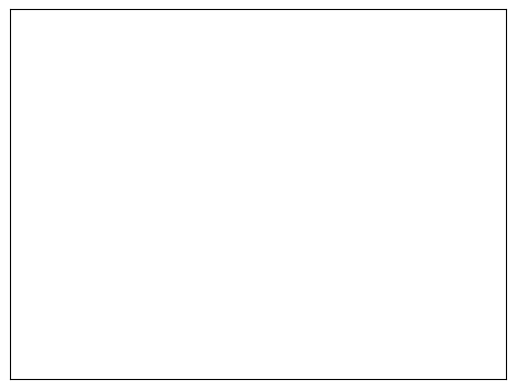

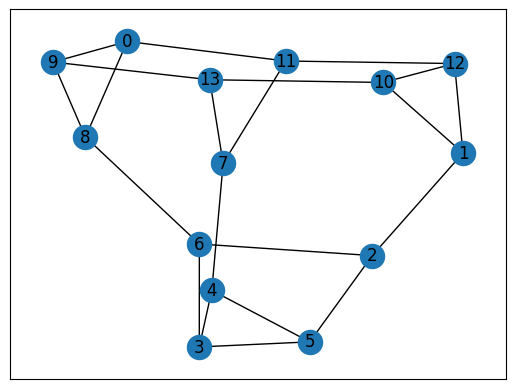

In [18]:

# L,threshholdCoeff = alpha/d*numpy.exp(-2*d*beta),3
L,threshholdCoeff = .5,10
q = (numpy.exp(-L/3)*(1-numpy.exp(-L/3)))**3
print(L,q)
# showModel(predictGraph(([[1, 1, 1], [1, -1, 1], [-1, -1, 1], [-1, 1, 1]], [(-1, -numpy.inf), (1, .1), (0, .5), (1, .8)]),True))
outs = [];
predicted = predictGraphEfficient(data,True)
# for i in range(vertices):

missedEdge, falseEdge=[0,0],[0,0];
for i in range(vertices):
    for j in range(vertices):
        if (a.model[i][j]!=0):
            if predicted[i][j]==0:
                missedEdge[0]+=1
            missedEdge[1]+=1
        if (predicted[i][j]!=0):
            if a.model[i][j]==0:
                falseEdge[0]+=1
            falseEdge[1]+=1

print("missedEdgeAcc = ",missedEdge[0]/missedEdge[1])
# print("falseEdgeAcc = ",falseEdge[0]/falseEdge[1])
print("divergence is ",getDivergence(predicted,a.model))
showModel(predicted)
showModel(a.model)


0 0 2 2 0 -10 4 4 -12 6 0 -16 -4 0 
0 0 -4 -8 0 -8 10 -4 0 -4 2 -6 6 0 
2 -4 0 -6 4 8 10 -4 8 2 2 18 -2 4 
2 -8 -6 0 6 6 2 -4 -2 0 2 6 -6 6 
0 0 4 6 0 4 0 4 2 0 -2 2 0 0 
-10 -8 8 6 4 0 -4 -4 2 -2 0 0 -2 8 
4 10 10 2 0 -4 0 -4 -10 -4 -8 4 -4 0 
4 -4 -4 -4 4 -4 -4 0 -6 -2 -6 2 -2 -24 
-12 0 8 -2 2 2 -10 -6 0 -2 0 -6 2 2 
6 -4 2 0 0 -2 -4 -2 -2 0 2 0 2 -8 
0 2 2 2 -2 0 -8 -6 0 2 0 -6 0 -4 
-16 -6 18 6 2 0 4 2 -6 0 -6 0 4 -4 
-4 6 -2 -6 0 -2 -4 -2 2 2 0 4 0 -10 
0 0 4 6 0 8 0 -24 2 -8 -4 -4 -10 0 
4.079425873931697


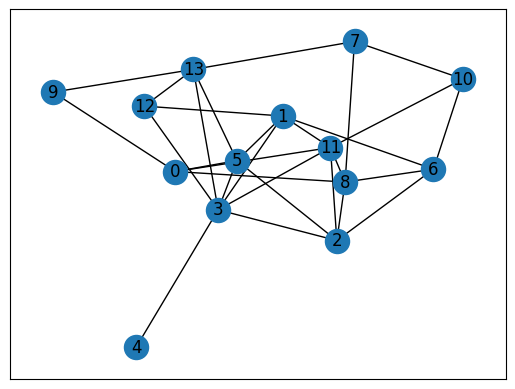

divergence is :	 14.106213664741015
missedEdgeAcc =  10
falseEdgeAcc =  18


In [22]:
# threshholdCoeff= 18
for i in range(vertices):
    for j in range(vertices):
        print(outs[i][j],end=" ")
        predicted[i][j] = (outs[i][j]/abs(outs[i][j])*alpha) if abs(outs[i][j])>4 else 0
    print()
print(5.696917469558674e-09 *59673000*12)
missedEdge, falseEdge=[0,0],[0,0];
for i in range(vertices):
    for j in range(i):
        if (a.model[i][j]!=0):
            if predicted[i][j]==0:
                missedEdge[0]+=1
            missedEdge[1]+=1
        if (predicted[i][j]!=0):
            if a.model[i][j]==0:
                falseEdge[0]+=1
            falseEdge[1]+=1
showModel(predicted)
print("divergence is :\t",getDivergence(a.model,predicted))
print("missedEdgeAcc = ",missedEdge[0])
print("falseEdgeAcc = ",falseEdge[0])